# Exploring Data with Python

A significant part of a data scientist's role is to explore, analyze, and visualize data. There's a wide range of tools and programming languages that they can use to do this, and of the most popular approaches is to use Jupyter notebooks (like this one) and Python.

Python is a flexible programming language that is used in a wide range of scenarios; from web applications to device programming. It's extremely popular in the data science and machine learning community because of the many packages it supports for data analysis and visualization.

In this notebook, we'll explore some of these packages, and apply basic techniques to analyze data. This is not intended to be a comprehensive Python programming exercise; or even a deep dive into data analysis. Rather, it's intended as a crash course in some of the common ways in which data scientists can use Python to work with data.


## Exploring data arrays with NumPy

Let's start by looking at some simple data.

Suppose a college takes a sample of student grades for a data science class.

Run the code in the cell below by clicking the **&#9658; Run** button to see the data.

In [3]:
#Current working directoty
import os
print(os.getcwd())

C:\Users\faraz211724\Downloads


In [111]:
data = [50,50,47,97,49,3,53,42,26,74,82,62,37,15,70,27,36,35,48,52,63,64]
print(data)

[50, 50, 47, 97, 49, 3, 53, 42, 26, 74, 82, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64]


The data has been loaded into a Python **list** structure, which is a good data type for general data manipulation, but not optimized for numeric analysis. For that, we're going to use the **NumPy** package, which includes specific data types and functions for working with *Num*bers in *Py*thon.

Run the cell below to load the data into a NumPy **array**.

In [112]:
import numpy as np

grades = np.array(data)
print(grades)

[50 50 47 97 49  3 53 42 26 74 82 62 37 15 70 27 36 35 48 52 63 64]


Just in case you're wondering about the differences between a **list** and a NumPy **array**, let's compare how these data types behave when we use them in an expression that multiplies them by 2.

In [113]:
print (type(data),'x 2:', data * 2)
print('---')
print (type(grades),'x 2:', grades * 2)

<class 'list'> x 2: [50, 50, 47, 97, 49, 3, 53, 42, 26, 74, 82, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64, 50, 50, 47, 97, 49, 3, 53, 42, 26, 74, 82, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64]
---
<class 'numpy.ndarray'> x 2: [100 100  94 194  98   6 106  84  52 148 164 124  74  30 140  54  72  70
  96 104 126 128]


Note that multiplying a list by 2 creates a new list of twice the length with the original sequence of list elements repeated. Multiplying a NumPy array on the other hand performs an element-wise calculation in which the array behaves like a *vector*, so we end up with an array of the same size in which each element has been multiplied by 2.

The key takeaway from this is that NumPy arrays are specifically designed to support mathematical operations on numeric data - which makes them more useful for data analysis than a generic list.

You might have spotted that the class type for the numpy array above is a **numpy.ndarray**. The **nd** indicates that this is a structure that can consists of multiple *dimensions* (it can have *n* dimensions). Our specific instance has a single dimension of student grades.

Run the cell below to view the **shape** of the array.

In [114]:
grades.shape

(22,)

The shape confirms that this array has only one dimension, which contains 22 elements (there are 22 grades in the original list). You can access the individual elements in the array by their zero-based ordinal position. Let's get the first element (the one in position 0).

In [115]:
grades[5]

3

Alright, now you know your way around a NumPy array, it's time to perform some analysis of the grades data.

You can apply aggregations across the elements in the array, so let's find the simple average grade (in other words, the *mean* grade value).

In [116]:
grades.mean()

49.18181818181818

So the mean grade is just around 50 - more or less in the middle of the possible range from 0 to 100.

Let's add a second set of data for the same students, this time recording the typical number of hours per week they devoted to studying.

In [117]:
# Define an array of study hours
study_hours = [10.0,11.5,9.0,16.0,9.25,1.0,11.5,9.0,8.5,14.5,15.5,
               13.75,9.0,8.0,15.5,8.0,9.0,6.0,10.0,12.0,12.5,12.0]

# Create a 2D array (an array of arrays)
student_data = np.array([study_hours, grades])

# display the array
student_data

array([[10.  , 11.5 ,  9.  , 16.  ,  9.25,  1.  , 11.5 ,  9.  ,  8.5 ,
        14.5 , 15.5 , 13.75,  9.  ,  8.  , 15.5 ,  8.  ,  9.  ,  6.  ,
        10.  , 12.  , 12.5 , 12.  ],
       [50.  , 50.  , 47.  , 97.  , 49.  ,  3.  , 53.  , 42.  , 26.  ,
        74.  , 82.  , 62.  , 37.  , 15.  , 70.  , 27.  , 36.  , 35.  ,
        48.  , 52.  , 63.  , 64.  ]])

Now the data consists of a 2-dimensional array - an array of arrays. Let's look at its shape.

In [118]:
# Show shape of 2D array
student_data.shape

(2, 22)

The **student_data** array contains two elements, each of which is an array containing 22 elements.

To navigate this structure, you need to specify the position of each element in the hierarchy. So to find the first value in the first array (which contains the study hours data), you can use the following code.

In [119]:
# Show the first element of the first element
student_data[1][0]

50.0

Now you have a multidimensional array containing both the student's study time and grade information, which you can use to compare data. For example, how does the mean study time compare to the mean grade?

In [120]:
# Get the mean value of each sub-array
avg_study = student_data[0].mean()
avg_grade = student_data[1].mean()

print('Average study hours: {:.2f}\nAverage grade: {:.2f}'.format(avg_study, avg_grade))

Average study hours: 10.52
Average grade: 49.18


## Exploring tabular data with Pandas

While NumPy provides a lot of the functionality you need to work with numbers, and specifically arrays of numeric values; when you start to deal with two-dimensional tables of data, the **Pandas** package offers a more convenient structure to work with - the **DataFrame**.

Run the following cell to import the Pandas library and create a DataFrame with three columns. The first column is a list of student names, and the second and third columns are the NumPy arrays containing the study time and grade data.

In [121]:
import pandas as pd

df_students = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 
                                     'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny',
                                     'Jakeem','Helena','Ismat','Anila','Skye','Daniel','Aisha'],
                            'StudyHours':student_data[0],
                            'Grade':student_data[1]})

df_students 

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0


Note that in addition to the columns you specified, the DataFrame includes an *index* to unique identify each row. We could have specified the index explicitly, and assigned any kind of appropriate value (for example, an email address); but because we didn't specify an index, one has been created with a unique integer value for each row.

### Finding and filtering data in a DataFrame

You can use the DataFrame's **loc** method to retrieve data for a specific index value, like this.

In [122]:
# Get the data for index value 5
df_students.loc[5]

Name          Vicky
StudyHours      1.0
Grade           3.0
Name: 5, dtype: object

You can also get the data at a range of index values, like this:

In [123]:
# Get the rows with index values from 0 to 5: loc: INDEX POSITIONS
df_students.loc[0:5]

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0


In addition to being able to use the **loc** method to find rows based on the index, you can use the **iloc** method to find rows based on their ordinal position in the DataFrame (regardless of the index):

In [124]:
# Get data in the first five rows: iloc----->DOESNT INCLUDE UPPER BOUND VALUE
df_students.iloc[0:5]

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0


Look carefully at the `iloc[0:5]` results, and compare them to the `loc[0:5]` results you obtained previously. Can you spot the difference?

The **loc** method returned rows with index *label* in the list of values from *0* to *5* - which includes *0*, *1*, *2*, *3*, *4*, and *5* (six rows). However, the **iloc** method returns the rows in the *positions* included in the range 0 to 5, and since integer ranges don't include the upper-bound value, this includes positions *0*, *1*, *2*, *3*, and *4* (five rows).

**iloc** identifies data values in a DataFrame by *position*, which extends beyond rows to columns. So for example, you can use it to find the values for the columns in positions 1 and 2 in row 0, like this:

In [125]:
df_students.iloc[0,[1,2]]

StudyHours    10.0
Grade         50.0
Name: 0, dtype: object

Let's return to the **loc** method, and see how it works with columns. Remember that **loc** is used to locate data items based on index values rather than positions. In the absence of an explicit index column, the rows in our dataframe are indexed as integer values, but the columns are identified by name:

In [126]:
df_students.loc[0,'Grade']

50.0

Here's another useful trick. You can use the **loc** method to find indexed rows based on a filtering expression that references named columns other than the index, like this:

In [127]:
df_students.loc[df_students['Name']=='Aisha']

,Name,StudyHours,Grade
21,Aisha,12.0,64.0


Actually, you don't need to explicitly use the **loc** method to do this - you can simply apply a DataFrame filtering expression, like this:

In [128]:
df_students[df_students['Name']=='Aisha']

,Name,StudyHours,Grade
21,Aisha,12.0,64.0


And for good measure, you can achieve the same results by using the DataFrame's **query** method, like this:

In [129]:
df_students.query('Name=="Aisha"')

,Name,StudyHours,Grade
21,Aisha,12.0,64.0


The three previous examples underline an occassionally confusing truth about working with Pandas. Often, there are multiple ways to achieve the same results. Another example of this is the way you refer to a DataFrame column name. You can specify the column name as a named index value (as in the `df_students['Name']` examples we've seen so far), or you can use the column as a property of the DataFrame, like this:

In [130]:
df_students[df_students.Name == 'Aisha']

,Name,StudyHours,Grade
21,Aisha,12.0,64.0


### Loading a DataFrame from a  file

We constructed the DataFrame from some existing arrays. However, in many real-world scenarios, data is loaded from sources such as files. Let's replace the student grades DataFrame with the contents of a text file.

In [25]:
import os

In [26]:
os.getcwd()

'C:\\Users\\faraz211724\\Downloads'

In [131]:
df_students = pd.read_csv('C:/Users/faraz211724/Downloads/grades.csv',delimiter=',')
df_students.head()

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0


The DataFrame's **read_csv** method is used to load data from text files. As you can see in the example code, you can specify options such as the column delimiter and which row (if any) contains column headers (in this case, the delimiter is a comma and the first row contains the column names - these are the default settings, so the parameters could have been omitted).


### Handling missing values

One of the most common issues data scientists need to deal with is incomplete or missing data. So how would we know that the DataFrame contains missing values? You can use the **isnull** method to identify which individual values are null, like this:

In [132]:
print(df_students)

         Name  StudyHours  Grade
0         Dan       10.00   50.0
1       Joann       11.50   50.0
2       Pedro        9.00   47.0
3       Rosie       16.00   97.0
4       Ethan        9.25   49.0
5       Vicky        1.00    3.0
6    Frederic       11.50   53.0
7      Jimmie        9.00   42.0
8      Rhonda        8.50   26.0
9    Giovanni       14.50   74.0
10  Francesca       15.50   82.0
11      Rajab       13.75   62.0
12    Naiyana        9.00   37.0
13       Kian        8.00   15.0
14      Jenny       15.50   70.0
15     Jakeem        8.00   27.0
16     Helena        9.00   36.0
17      Ismat        6.00   35.0
18      Anila       10.00   48.0
19       Skye       12.00   52.0
20     Daniel       12.50   63.0
21      Aisha       12.00   64.0
22       Bill        8.00    NaN
23        Ted         NaN    NaN


In [133]:
df_students.isnull()

,Name,StudyHours,Grade
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


Of course, with a larger DataFrame, it would be inefficient to review all of the rows and columns individually; so we can get the sum of missing values for each column, like this:

In [134]:
df_students.isnull().sum()

Name          0
StudyHours    1
Grade         2
dtype: int64

So now we know that there's one missing **StudyHours** value, and two missing **Grade** values.

To see them in context, we can filter the dataframe to include only rows where any of the columns (axis 1 of the DataFrame) are null.

The axis parameter in pandas isnull() function specifies the axis along which to check for missing values. If axis=1, it means to check for missing values in each row. If axis=0, it means to check for missing values in each column.

In [135]:
df_students[df_students.isnull().any(axis=1)]

,Name,StudyHours,Grade
22,Bill,8.0,NaN
23,Ted,NaN,NaN


When the DataFrame is retrieved, the missing numeric values show up as **NaN** (*not a number*).

So now that we've found the null values, what can we do about them?

One common approach is to *impute* replacement values. For example, if the number of study hours is missing, we could just assume that the student studied for an average amount of time and replace the **missing value with the mean study hours.** To do this, we can use the **fillna** method, like this:

In [80]:
#df = pd.DataFrame(df_students)
#cloumn_with_null = df.columns[df.isna().any()]
#print("column with null values:")
#for column in cloumn_with_null:
#    print(column)

column with null values:
StudyHours
Grade


In [136]:
df_students.StudyHours = df_students.StudyHours.fillna(df_students.StudyHours.mean())
df_students

,Name,StudyHours,Grade
0,Dan,10.000000,50.0
1,Joann,11.500000,50.0
2,Pedro,9.000000,47.0
3,Rosie,16.000000,97.0
4,Ethan,9.250000,49.0
5,Vicky,1.000000,3.0
6,Frederic,11.500000,53.0
7,Jimmie,9.000000,42.0
8,Rhonda,8.500000,26.0
9,Giovanni,14.500000,74.0


Alternatively, it might be important to ensure that you only use data you know to be absolutely correct; so you can drop rows or columns that contains null values by using the **dropna** method. In this case, we'll remove rows (axis 0 of the DataFrame) where any of the columns contain null values.

In [138]:
df_students = df_students.dropna(axis=0)
df_students

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0


### Explore data in the DataFrame

Now that we've cleaned up the missing values, we're ready to explore the data in the DataFrame. Let's start by comparing the mean study hours and grades.

In Python, {:.2f} is used for formatting a number as a float with two decimal places. The colon : is the start of the format specification. The .2f means that you want the number to be formatted as a float with two digits after the decimal point

In [139]:
# Get the mean study hours using the column name as an index
mean_study = df_students['StudyHours'].mean()

# Get the mean grade using the column name as a property (just to make the point!)
mean_grade = df_students.Grade.mean()

# Print the mean study hours and mean grade
print('Average weekly study hours: {:.2f}\nAverage grade: {:.2f}'.format(mean_study, mean_grade))

Average weekly study hours: 10.52
Average grade: 49.18


OK, let's filter the DataFrame to find only the students who studied for more than the average amount of time.

In [140]:
# Get students who studied for the mean or more hours
df_students[df_students.StudyHours > mean_study]

,Name,StudyHours,Grade
1,Joann,11.50,50.0
3,Rosie,16.00,97.0
6,Frederic,11.50,53.0
9,Giovanni,14.50,74.0
10,Francesca,15.50,82.0
11,Rajab,13.75,62.0
14,Jenny,15.50,70.0
19,Skye,12.00,52.0
20,Daniel,12.50,63.0
21,Aisha,12.00,64.0


Note that the filtered result is itself a DataFrame, so you can work with its columns just like any other DataFrame.

For example, let's find the average grade for students who undertook more than the average amount of study time.

In [141]:
# What was their mean grade?
df_students[df_students.StudyHours > mean_study].Grade.mean()

66.7

Let's assume that the passing grade for the course is 60.

We can use that information to add a new column to the DataFrame, indicating whether or not each student passed.

First, we'll create a Pandas **Series** containing the pass/fail indicator (True or False), and then we'll concatenate that series as a new column (axis 1) in the DataFrame.

In [142]:
passes  = pd.Series(df_students['Grade'] >= 60)
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)

df_students

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


DataFrames are designed for tabular data, and you can use them to perform many of the kinds of data analytics operation you can do in a relational database; such as grouping and aggregating tables of data.

For example, you can use the **groupby** method to group the student data into groups based on the **Pass** column you added previously, and count the number of names in each group - in other words, you can determine how many students passed and failed.

In [89]:
print(df_students.groupby(df_students.Pass).Name.count())

Pass
False    15
True      7
Name: Name, dtype: int64


You can aggregate multiple fields in a group using any available aggregation function. For example, you can find the mean study time and grade for the groups of students who passed and failed the course.

In [90]:
print(df_students.groupby(df_students.Pass)['StudyHours', 'Grade'].mean())

       StudyHours      Grade
Pass                        
False    8.783333  38.000000
True    14.250000  73.142857


C:\Users\faraz211724\AppData\Local\Temp\ipykernel_17460\2502225861.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df_students.groupby(df_students.Pass)['StudyHours', 'Grade'].mean())


DataFrames are amazingly versatile, and make it easy to manipulate data. Many DataFrame operations return a new copy of the DataFrame; so if you want to modify a DataFrame but keep the existing variable, you need to assign the result of the operation to the existing variable. For example, the following code sorts the student data into descending order of Grade, and assigns the resulting sorted DataFrame to the original **df_students** variable.

In [93]:
# Create a DataFrame with the data sorted by Grade (descending)
df_students = df_students.sort_values('Grade', ascending=False)

# Show the DataFrame
df_students

,Name,StudyHours,Grade,Pass1,Pass
3,Rosie,16.00,97.0,True,True
10,Francesca,15.50,82.0,True,True
9,Giovanni,14.50,74.0,True,True
14,Jenny,15.50,70.0,True,True
21,Aisha,12.00,64.0,True,True
20,Daniel,12.50,63.0,True,True
11,Rajab,13.75,62.0,True,True
6,Frederic,11.50,53.0,False,False
19,Skye,12.00,52.0,False,False
1,Joann,11.50,50.0,False,False


## Visualizing data with Matplotlib

DataFrames provide a great way to explore and analyze tabular data, but sometimes a picture is worth a thousand rows and columns. The **Matplotlib** library provides the foundation for plotting data visualizations that can greatly enhance your ability to analyze the data.

Let's start with a simple bar chart that shows the grade of each student.

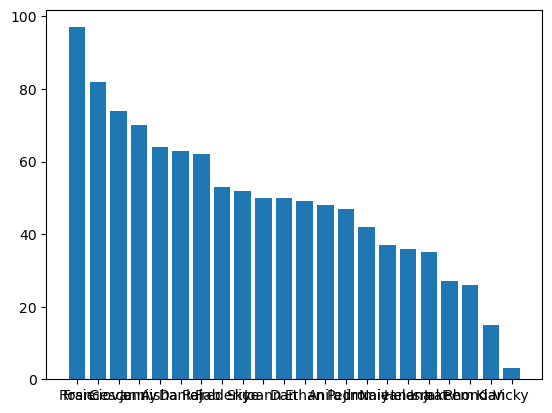

In [94]:
# Ensure plots are displayed inline in the notebook
%matplotlib inline

from matplotlib import pyplot as plt

# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade)

# Display the plot
plt.show()

Well, that worked; but the chart could use some improvements to make it clearer what we're looking at.

Note that you used the **pyplot** class from Matplotlib to plot the chart. This class provides a whole bunch of ways to improve the visual elements of the plot. For example, the following code:

- Specifies the color of the bar chart.
- Adds a title to the chart (so we know what it represents)
- Adds labels to the X and Y (so we know which axis shows which data)
- Adds a grid (to make it easier to determine the values for the bars)
- Rotates the X markers (so we can read them)

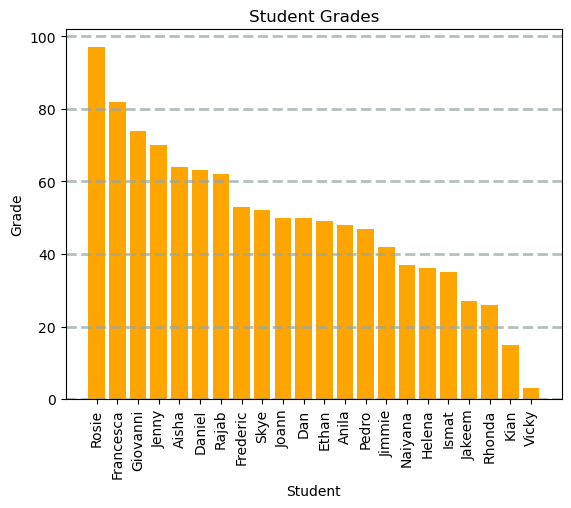

In [43]:
# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade, color='orange')

# Customize the chart
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Display the plot
plt.show()

A plot is technically contained with a **Figure**. In the previous examples, the figure was created implicitly for you; but you can create it explicitly. For example, the following code creates a figure with a specific size.

The color code #95a5a6 represents a shade of gray in the hexadecimal color system used in HTML and CSS.

HTML color codes are hexadecimal triplets representing the colors red, green, and blue (#RRGGBB). For example, in the color red, the color code is #FF0000, which is ‘255’ red, ‘0’ green, and ‘0’ blue1.

Here are some common color names and codes:

Red: #FF0000
White: #FFFFFF
Cyan: #00FFFF
Silver: #C0C0C0
Blue: #0000FF
Gray or Grey: #808080
DarkBlue: #00008B
Black: #000000
LightBlue: #ADD8E6
Orange: #FFA500
Purple: #800080
Brown: #A52A2A
Yellow: #FFFF00
Maroon: #800000
Lime: #00FF00
Green: #008000
Magenta: #FF00FF
Olive: #808000
Pink: #FFC0CB
Aquamarine: #7FFFD4

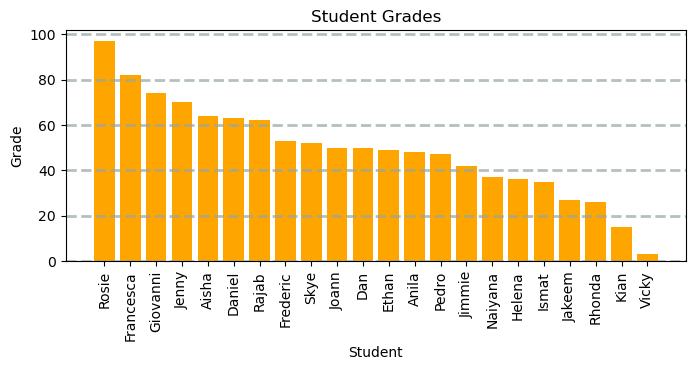

In [97]:
# Create a Figure
fig = plt.figure(figsize=(8,3))

# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade, color='orange')

# Customize the chart
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y')
plt.xticks(rotation=90)

# Show the figure
plt.show()

A figure can contain multiple subplots, each on its own *axis*.

For example, the following code creates a figure with two subplots - one is a bar chart showing student grades, and the other is a pie chart comparing the number of passing grades to non-passing grades.

C:\Users\faraz211724\AppData\Local\Temp\ipykernel_17460\1219288656.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(df_students.Name, rotation=90)
C:\Users\faraz211724\AppData\Local\Temp\ipykernel_17460\1219288656.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


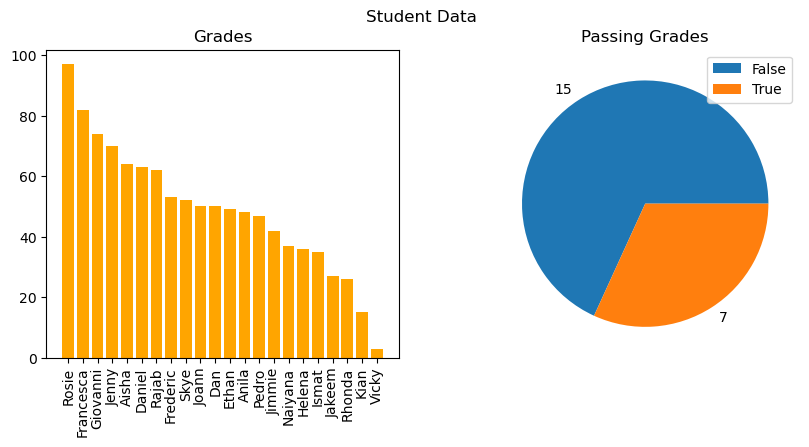

In [107]:
# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Create a bar plot of name vs grade on the first axis
ax[0].bar(x=df_students.Name, height=df_students.Grade, color='orange')
ax[0].set_title('Grades')
ax[0].set_xticklabels(df_students.Name, rotation=90)

# Create a pie chart of pass counts on the second axis
pass_counts = df_students['Pass'].value_counts()
ax[1].pie(pass_counts, labels=pass_counts)
ax[1].set_title('Passing Grades')
ax[1].legend(pass_counts.keys().tolist())

# Add a title to the Figure
fig.suptitle('Student Data')
#fig.tight_layout(pad=3.0)  # Add padding of 3.0 units between subplots
# Show the figure
fig.show()

Until now, you've used methods of the Matplotlib.pyplot object to plot charts. However, Matplotlib is so foundational to graphics in Python that many packages, including Pandas, provide methods that abstract the underlying Matplotlib functions and simplify plotting. For example, the DataFrame provides its own methods for plotting data, as shown in the following example to plot a bar chart of study hours.

<AxesSubplot:xlabel='Name'>

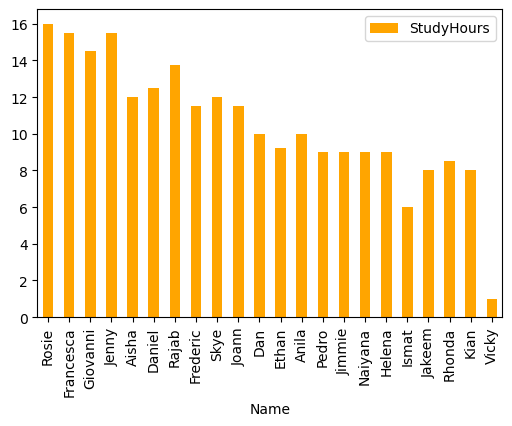

In [100]:
df_students.plot.bar(x='Name', y='StudyHours', color='orange', figsize=(6,4))

## Getting started with statistical analysis

Now that you know how to use Python to manipulate and visualize data, you can start analyzing it.

A lot of data science is rooted in *statistics*, so we'll explore some basic statistical techniques.

> **Note**: This is not intended to teach you statistics - that's much too big a topic for this notebook. It will however introduce you to some statistical concepts and techniques that data scientists use as they explore data in preparation for machine learning modeling.

### Descriptive statistics and data distribution

When examining a *variable* (for example a sample of student grades), data scientists are particularly interested in its *distribution* (in other words, how are all the different grade values spread across the sample). The starting point for this exploration is often to visualize the data as a histogram, and see how frequently each value for the variable occurs.






C:\Users\faraz211724\AppData\Local\Temp\ipykernel_17460\4182697007.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


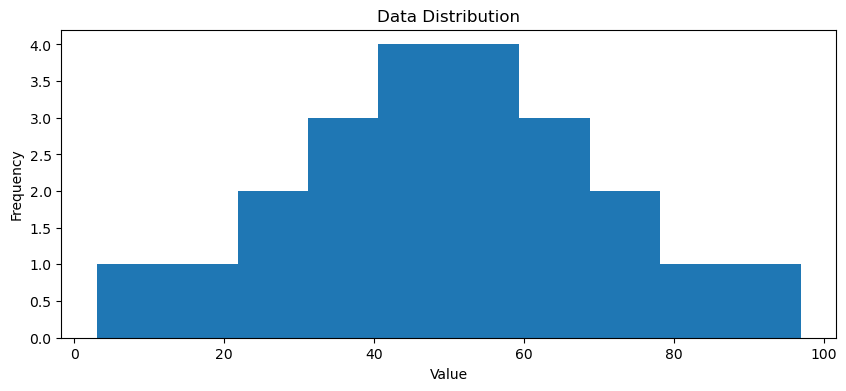

In [47]:
# Get the variable to examine
var_data = df_students['Grade']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var_data)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
fig.show()

The histogram for grades is a symmetric shape, where the most frequently occurring grades tend to be in the middle of the range (around 50), with fewer grades at the extreme ends of the scale.

#### Measures of central tendency

To understand the distribution better, we can examine so-called *measures of central tendency*; which is a fancy way of describing statistics that represent the "middle" of the data. The goal of this is to try to find a "typical" value. Common ways to define the middle of the data include:

- The *mean*: A simple average based on adding together all of the values in the sample set, and then dividing the total by the number of samples.
- The *median*: The value in the middle of the range of all of the sample values.
- The *mode*: The most commonly occuring value in the sample set<sup>\*</sup>.

Let's calculate these values, along with the minimum and maximum values for comparison, and show them on the histogram.

> <sup>\*</sup>Of course, in some sample sets , there may be a tie for the most common value - in which case the dataset is described as *bimodal* or even *multimodal*.

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\faraz211724\AppData\Local\Temp\ipykernel_17460\2664441753.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


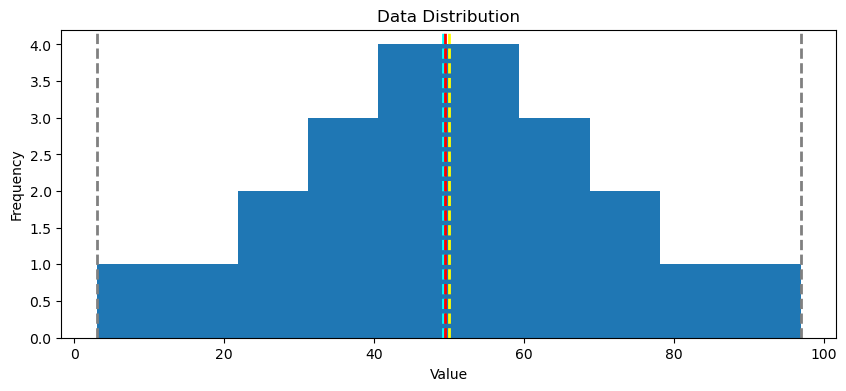

In [101]:
# Get the variable to examine
var = df_students['Grade']

# Get statistics
min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()
mod_val = var.mode()[0]

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                        mean_val,
                                                                                        med_val,
                                                                                        mod_val,
                                                                                        max_val))

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var)

#The plt.axvline function in matplotlib is used to add a vertical line across the axes of the plot
plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
fig.show()

For the grade data, the mean, median, and mode all seem to be more or less in the middle of the minimum and maximum, at around 50.

Another way to visualize the distribution of a variable is to use a *box* plot (sometimes called a *box-and-whiskers* plot). Let's create one for the grade data.

C:\Users\faraz211724\AppData\Local\Temp\ipykernel_17460\4088679524.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


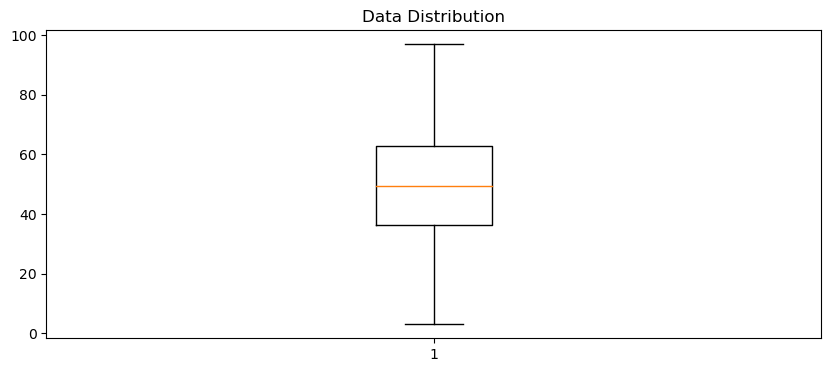

In [49]:
# Get the variable to examine
var = df_students['Grade']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.boxplot(var)

# Add titles and labels
plt.title('Data Distribution')

# Show the figure
fig.show()

The box plot shows the distribution of the grade values in a different format to the histogram. The *box* part of the plot shows where the inner two *quartiles* of the data reside - so in this case, half of the grades are between approximately 36 and 63. The *whiskers* extending from the box show the outer two quartiles; so the other half of the grades in this case are between 0 and 36 or 63 and 100. The line in the box indicates the *median* value.

It's often useful to combine histograms and box plots, with the box plot's orientation changed to align it with the histogram (in some ways, it can be helpful to think of the histogram as a "front elevation" view of the distribution, and the box plot as a "plan" view of the distribution from above.)

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\faraz211724\AppData\Local\Temp\ipykernel_17460\1918122812.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


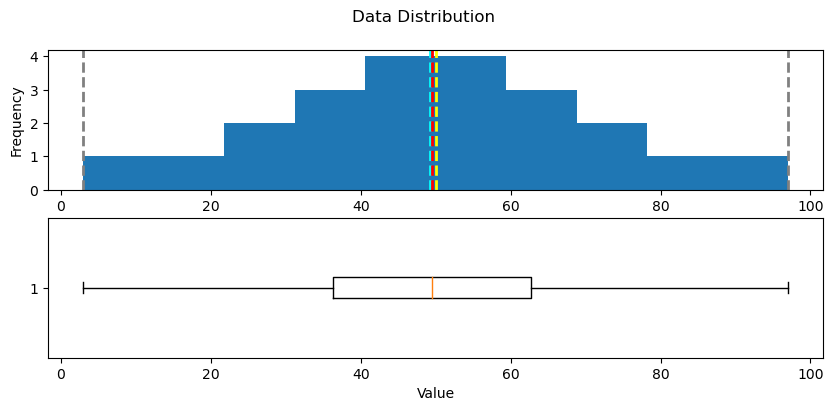

In [103]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()

# Get the variable to examine
col = df_students['Grade']
# Call the function
show_distribution(col)

All of the measurements of central tendency are right in the middle of the data distribution, which is symmetric with values becoming progressively lower in both directions from the middle.

To explore this distribution in more detail, you need to understand that statistics is fundamentally about taking *samples* of data and using probability functions to extrapolate information about the full *population* of data. For example, the student data consists of 22 samples, and for each sample there is a grade value. You can think of each sample grade as a variable that's been randomly selected from the set of all grades awarded for this course. With enough of these random variables, you can calculate something called a *probability density function*, which estimates the distribution of grades for the full population.

The Pandas DataFrame class provides a helpful plot function to show this density.

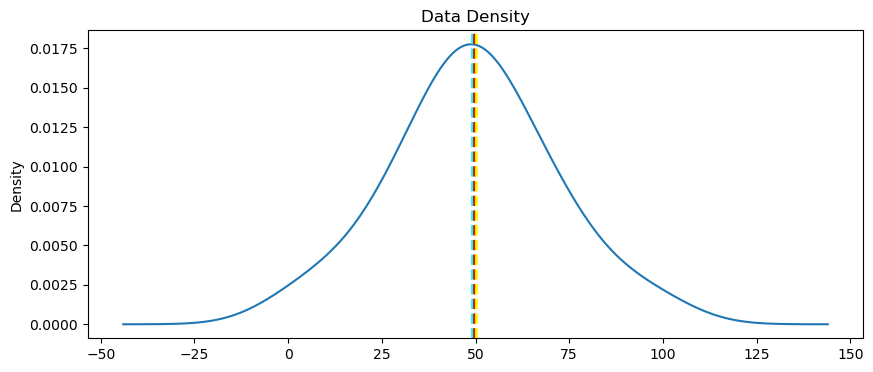

In [52]:
def show_density(var_data):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of Grade
col = df_students['Grade']
show_density(col)

As expected from the histogram of the sample, the density shows the characteristic 'bell curve" of what statisticians call a *normal* distribution with the mean and mode at the center and symmetric tails.

Now let's take a look at the distribution of the study hours data.

Minimum:1.00
Mean:10.52
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\faraz211724\AppData\Local\Temp\ipykernel_17460\1918122812.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


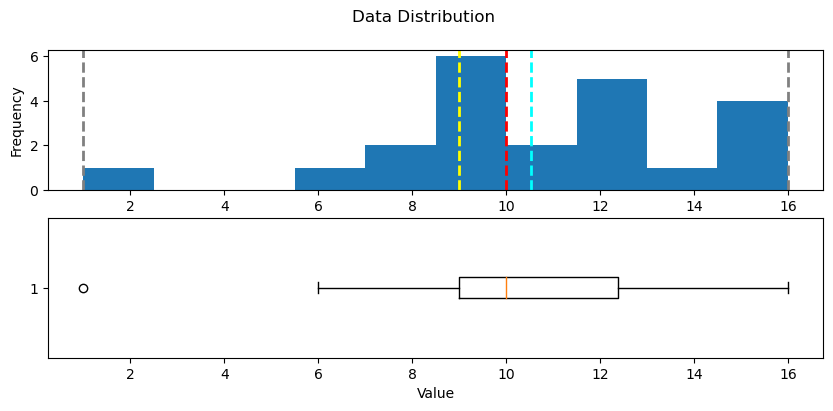

In [104]:
# Get the variable to examine
col = df_students['StudyHours']
# Call the function
show_distribution(col)

The distribution of the study time data is significantly different from that of the grades.

Note that the whiskers of the box plot only extend to around 6.0, indicating that the vast majority of the first quarter of the data is above this value. The minimum is marked with an **o**, indicating that it is statistically an *outlier* - a value that lies significantly outside the range of the rest of the distribution.

Outliers can occur for many reasons. Maybe a student meant to record "10" hours of study time, but entered "1" and missed the "0". Or maybe the student was abnormally lazy when it comes to studying! Either way, it's a statistical anomaly that doesn't represent a typical student. Let's see what the distribution looks like without it.

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\faraz211724\AppData\Local\Temp\ipykernel_17460\1918122812.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


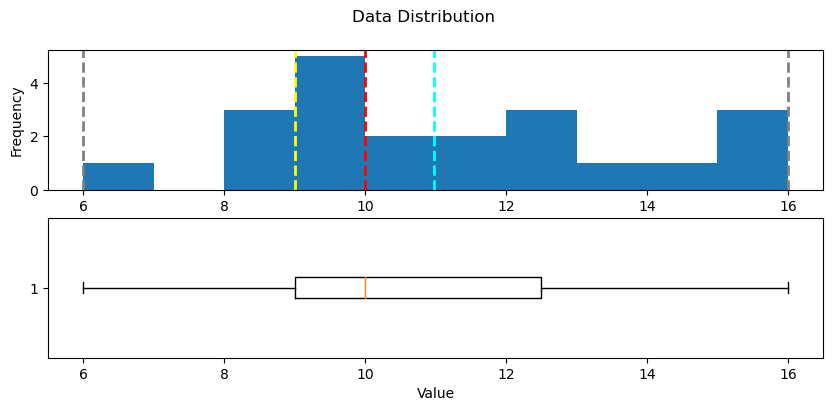

In [105]:
# Get the variable to examine
col = df_students[df_students.StudyHours>1]['StudyHours']
# Call the function
show_distribution(col)

In this example, the dataset is small enough to clearly see that the value **1** is an outlier for the **StudyHours** column, so you can exclude it explicitly.

This kind of distribution is called *right skewed*. The mass of the data is on the left side of the distribution, creating a long tail to the right because of the values at the extreme high end; which pull the mean to the right.

#### Measures of variance

So now we have a good idea where the middle of the grade and study hours data distributions are. However, there's another aspect of the distributions we should examine: how much variability is there in the data?

Typical statistics that measure variability in the data include:

- **Range**: The difference between the maximum and minimum. There's no built-in function for this, but it's easy to calculate using the **min** and **max** functions.
- **Variance**: The average of the squared difference from the mean. You can use the built-in **var** function to find this.
- **Standard Deviation**: The square root of the variance. You can use the built-in **std** function to find this.

In [57]:
for col_name in ['Grade','StudyHours']:
    col = df_students[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))


Grade:
 - Range: 94.00
 - Variance: 472.54
 - Std.Dev: 21.74

StudyHours:
 - Range: 15.00
 - Variance: 12.16
 - Std.Dev: 3.49


Of these statistics, the standard deviation is generally the most useful. It provides a measure of variance in the data on the same scale as the data itself (so grade points for the Grade distribution and hours for the StudyHours distribution). The higher the standard deviation, the more variance there is when comparing values in the distribution to the distribution mean - in other words, the data is more spread out.



In [54]:
df_students.describe()

,StudyHours,Grade
count,22.000000,22.000000
mean,10.522727,49.181818
std,3.487144,21.737912
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000


## Comparing data

Now that you know something about the statistical distribution of the data in your dataset, you're ready to examine your data to identify any apparent relationships between variables.

First of all, let's get rid of any rows that contain outliers so that we have a sample that is representative of a typical class of students. We identified that the StudyHours column contains some outliers with extremely low values, so we'll remove those rows.

In [55]:
df_sample = df_students[df_students['StudyHours']>1]
df_sample

,Name,StudyHours,Grade,Pass
3,Rosie,16.00,97.0,True
10,Francesca,15.50,82.0,True
9,Giovanni,14.50,74.0,True
14,Jenny,15.50,70.0,True
21,Aisha,12.00,64.0,True
20,Daniel,12.50,63.0,True
11,Rajab,13.75,62.0,True
6,Frederic,11.50,53.0,False
19,Skye,12.00,52.0,False
1,Joann,11.50,50.0,False


### Comparing numeric and categorical variables

The data includes two *numeric* variables (**StudyHours** and **Grade**) and two *categorical* variables (**Name** and **Pass**). Let's start by comparing the numeric **StudyHours** column to the categorical **Pass** column to see if there's an apparent relationship between the number of hours studied and a passing grade.

To make this comparison, let's create box plots showing the distribution of StudyHours for each possible Pass value (true and false).

<AxesSubplot:title={'center':'StudyHours'}, xlabel='Pass'>

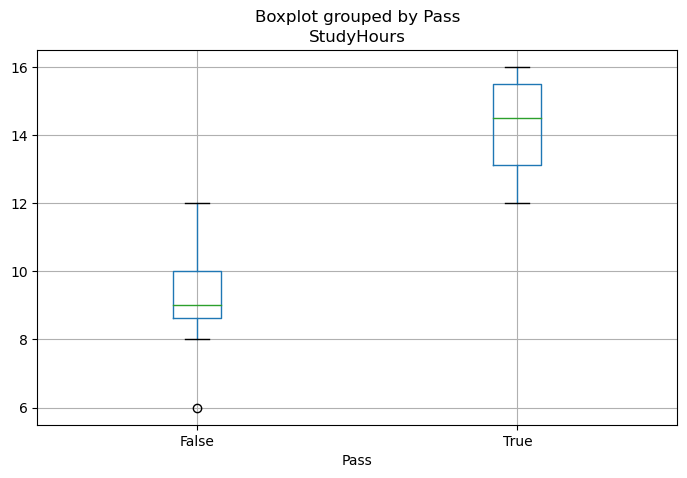

In [56]:
df_sample.boxplot(column='StudyHours', by='Pass', figsize=(8,5))

Comparing the StudyHours distributions, it's immediately apparent (if not particularly surprising) that students who passed the course tended to study for more hours than students who didn't. So if you wanted to predict whether or not a student is likely to pass the course, the amount of time they spend studying may be a good predictive feature.

### Comparing numeric variables

Now let's compare two numeric variables. We'll start by creating a bar chart that shows both grade and study hours.

<AxesSubplot:xlabel='Name'>

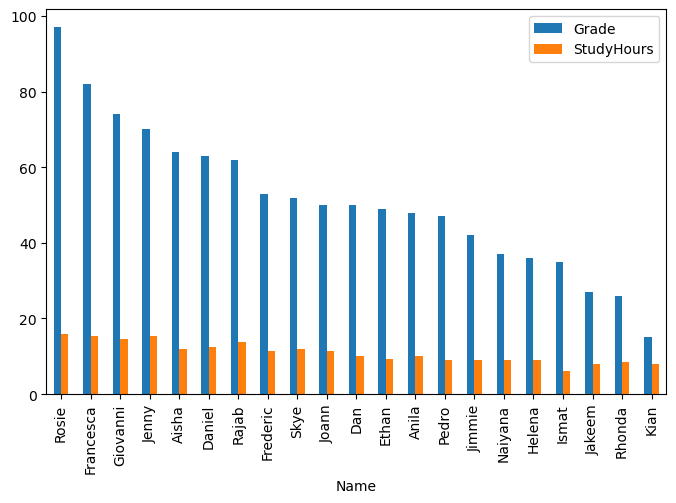

In [57]:
# Create a bar plot of name vs grade and study hours
df_sample.plot(x='Name', y=['Grade','StudyHours'], kind='bar', figsize=(8,5))